# BZAN 6355 – Homework 5

This notebook covers:
- Part 1: SVM Classification
- Part 2: Clustering using PCA and K-Means

Dataset: UCI Adult Dataset

## Part 1: SVM Classification

### Step 1: Load and describe the dataset

In [5]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Load dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets['income']

# Describe data
print("Shape:", X.shape)
print("Columns:", X.columns.tolist())
print("\nTarget classes:")
print(y.value_counts())

Shape: (48842, 14)
Columns: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

Target classes:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


### Step 2: Preprocess the data

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Combine features and target
df = pd.concat([X, y], axis=1)
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Binary encode target
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Encode categorical features
for col in df.drop('income', axis=1).select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Separate X/y and scale
X = df.drop('income', axis=1)
y = df['income']
X_scaled = StandardScaler().fit_transform(X)

### Step 3: SVM Classification with Different Kernels + Classification Report

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Stratified split to ensure both classes present
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Try multiple kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    print(f"\nSVM with {kernel} kernel")
    clf = SVC(kernel=kernel, C=1.0, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))


SVM with linear kernel
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7543
           1       0.72      0.02      0.04      1502

    accuracy                           0.84      9045
   macro avg       0.78      0.51      0.48      9045
weighted avg       0.82      0.84      0.77      9045


SVM with rbf kernel
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      7543
           1       0.66      0.17      0.27      1502

    accuracy                           0.85      9045
   macro avg       0.76      0.58      0.59      9045
weighted avg       0.82      0.85      0.81      9045


SVM with poly kernel
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      7543
           1       0.66      0.14      0.23      1502

    accuracy                           0.84      9045
   macro avg       0.75      0.56      0.57      9045
weighte

### Step 4: Precision, Recall, and ROC Curve

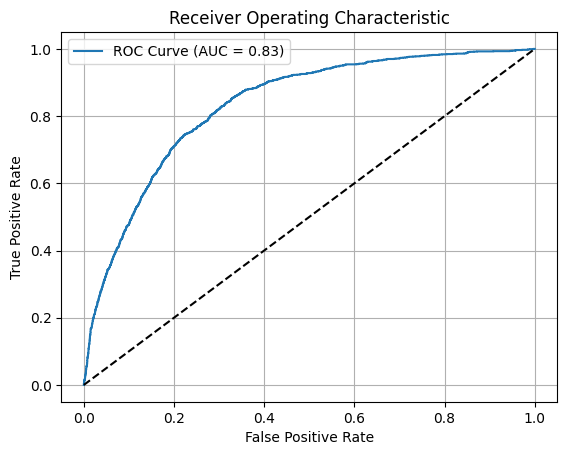

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Use RBF with probability for ROC
clf = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid()
plt.show()

## Part 2: Clustering using PCA and K-Means

### PCA-based Clustering

In [18]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Fit PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit simple classifier
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Evaluate
y_pred = model.predict(X_test_pca)
print("PCA Classifier Accuracy:", accuracy_score(y_test, y_pred))

PCA Classifier Accuracy: 0.8367053620784964


### K-Means Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

# Predict and evaluate
labels = kmeans.predict(X_test)
print("K-Means Silhouette Score:", silhouette_score(X_test, labels))

K-Means Silhouette Score: 0.13775823938686504
